In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.utils import shuffle
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    scorer = metrics.make_scorer(metrics.cohen_kappa_score,weights="quadratic")
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("quadratic weighted kappa")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scorer,n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [51]:
size = 10000 #specify the num of rows
data = pd.read_csv("train.csv")
data_small = data.sample(size).copy()

In [52]:
data_small_clean = pd.get_dummies(data_small,columns = ["Product_Info_1", "Product_Info_2", "Product_Info_3",
                               "Product_Info_5", "Product_Info_6", "Product_Info_7",
                               "Employment_Info_2", "Employment_Info_3", "Employment_Info_5",
                               "InsuredInfo_1", "InsuredInfo_2", "InsuredInfo_3", "InsuredInfo_4",
                               "InsuredInfo_5", "InsuredInfo_6", "InsuredInfo_7", "Insurance_History_1",
                               "Insurance_History_2", "Insurance_History_3", "Insurance_History_4",
                               "Insurance_History_7", "Insurance_History_8", "Insurance_History_9",
                               "Family_Hist_1", "Medical_History_2", "Medical_History_3", "Medical_History_4",
                               "Medical_History_5", "Medical_History_6", "Medical_History_7", "Medical_History_8",
                               "Medical_History_9", "Medical_History_11", "Medical_History_12", "Medical_History_13",
                               "Medical_History_14", "Medical_History_16", "Medical_History_17", "Medical_History_18",
                               "Medical_History_19", "Medical_History_20", "Medical_History_21", "Medical_History_22",
                               "Medical_History_23", "Medical_History_25", "Medical_History_26", "Medical_History_27",
                               "Medical_History_28", "Medical_History_29", "Medical_History_30", "Medical_History_31",
                               "Medical_History_33", "Medical_History_34", "Medical_History_35", "Medical_History_36",
                               "Medical_History_37", "Medical_History_38", "Medical_History_39", "Medical_History_40",
                               "Medical_History_41"],drop_first=True)

In [53]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
data_imputed = imp.fit_transform(data_small_clean)
data_small_clean.columns
data_imputed_df = pd.DataFrame(data_imputed,columns=data_small_clean.columns)

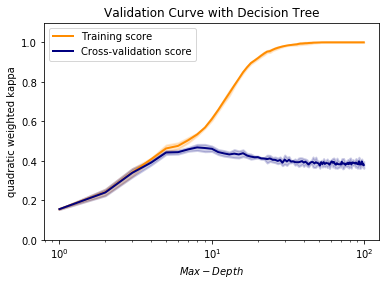

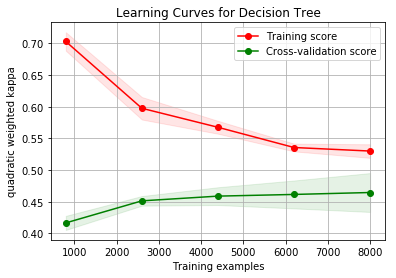

In [54]:
scorer = metrics.make_scorer(metrics.cohen_kappa_score,weights="quadratic") #use quadratic weighted kappa to score a model
X = data_imputed_df.drop('Response',1)
y = data_imputed_df['Response']
X_shuffle = shuffle(X)
y_shuffle = y[X_shuffle.index]
depth_range = range(1,100)
train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X_shuffle, y_shuffle, "max_depth",depth_range,scoring=scorer)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
#plot validation curve
plt.title("Validation Curve with Decision Tree")
plt.xlabel("$Max-Depth$")
plt.ylabel("quadratic weighted kappa")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(depth_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(depth_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(depth_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
#find the best depth
maxScore = 0
maxDepth = None
for i in range(test_scores.shape[0]):
    if np.mean(test_scores[i])>maxScore:
        maxScore = np.mean(test_scores[i])
        maxDepth = i+1
#plot learning curve
title = "Learning Curves for Decision Tree"
plot_learning_curve(DecisionTreeClassifier(max_depth=maxDepth), title, X_shuffle, y_shuffle, cv=5)
plt.show()


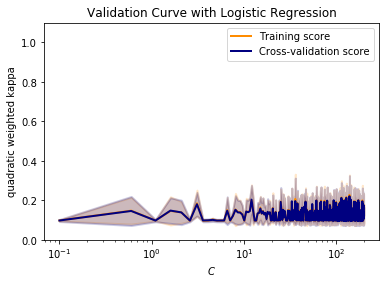

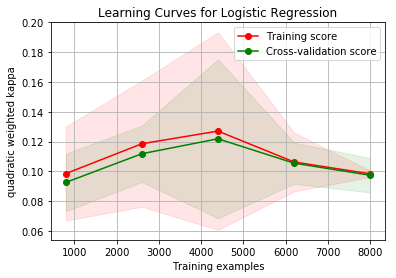

In [55]:
crange = np.arange(1e-1,200,0.5)
train_scores, test_scores = validation_curve(LogisticRegression(), X_shuffle, y_shuffle, "C",crange,scoring=scorer)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.title("Validation Curve with Logistic Regression")
plt.xlabel("$C$")
plt.ylabel("quadratic weighted kappa")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(crange, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(crange, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(crange, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(crange, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()
#find the best C
maxScore = 0
bestC = None
for i in range(test_scores.shape[0]):
    if np.mean(test_scores[i])>maxScore:
        maxScore = np.mean(test_scores[i])
        bestC = crange[i]
#plot learning curve
title = "Learning Curves for Logistic Regression"
plot_learning_curve(LogisticRegression(C=bestC), title, X_shuffle, y_shuffle, cv=5)
plt.show()

In [56]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd


def qwk(y1, y2):
    k = len(y1)
    O = [[0 for x in range(k)] for y in range(k)]  # k*k matrix
    E = [[0 for x in range(k)] for y in range(k)]  # k*k matrix
    W = [[0 for x in range(k)] for y in range(k)]  # k*k matrix
    for i in range(k):
        O[y1[i]][y2[i]] += 1 / k
    y1_df = pd.DataFrame(y1)
    y2_df = pd.DataFrame(y2)
    cnt1 = y1_df[0].value_counts()
    cnt1 /= k
    cnt2 = y2_df[0].value_counts()
    cnt2 /= k
    for i in cnt1.index:
        for j in cnt2.index:
            E[i][j] = cnt1[i] * cnt2[j]
    for i in range(k):
        for j in range(k):
            W[i][j] = (i - j) ** 2
    up = 0
    low = 0
    for i in range(k):
        for j in range(k):
            up += W[i][j] * O[i][j]
            low += W[i][j] * E[i][j]
    return 1 - up / low

In [59]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cohen_kappa_score(y_true, y_pred,weights='quadratic')

0.54545454545454541

In [60]:
qwk(y_true,y_pred)

0.54545454545454553